<a href="https://colab.research.google.com/github/lukman-17/EDA/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [7]:
df["species"].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

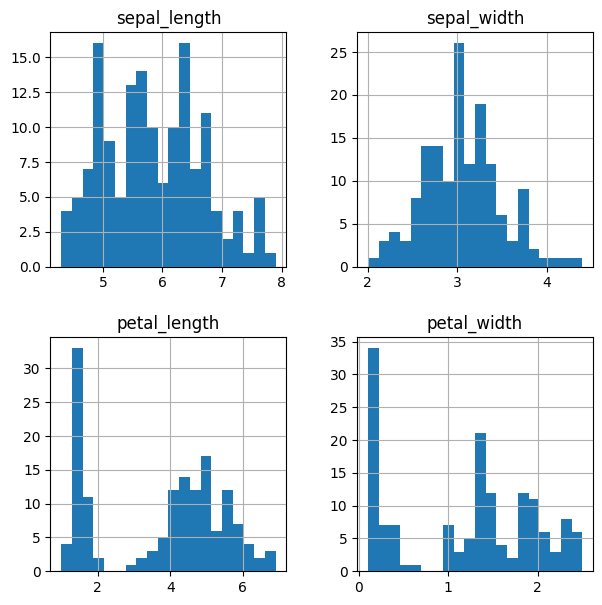

In [9]:
df.hist(figsize=(7,7), bins=20)

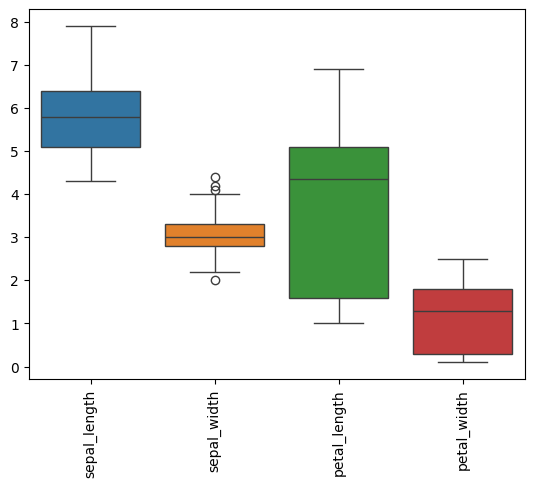

In [10]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

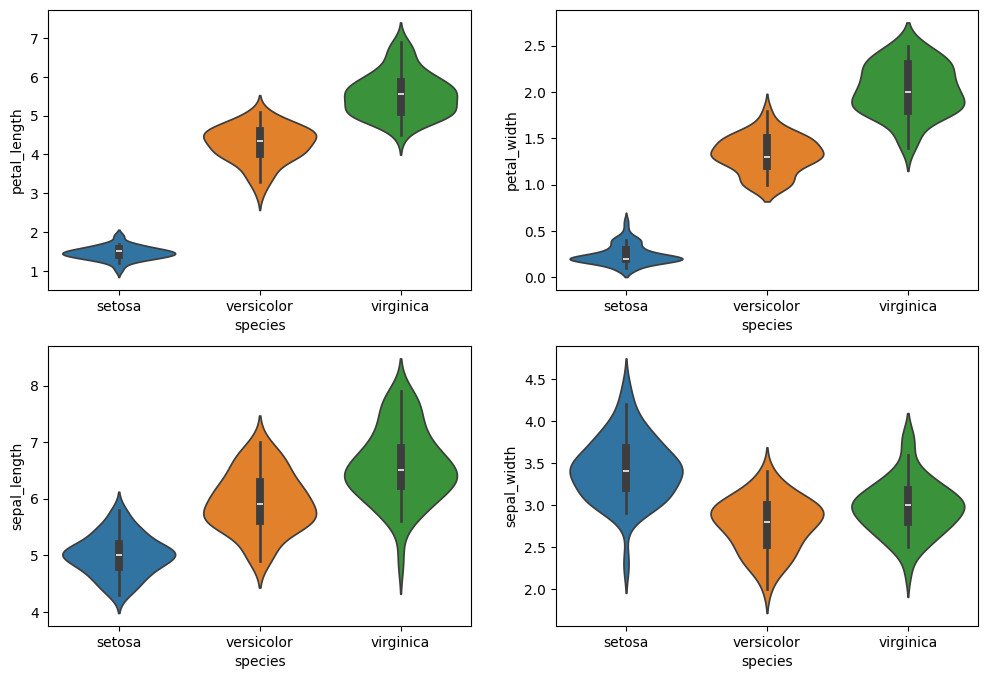

In [21]:
plt.figure(figsize=(12,8))
df = sns.load_dataset('iris')

plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df,hue='species')
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df,hue='species')
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df,hue='species')
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df,hue='species')

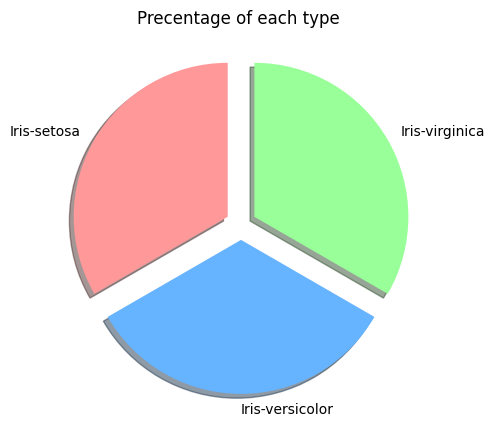

In [13]:
fig = plt.figure(figsize=(5,5))
labels=df['species'].unique()
precent=df['species'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(precent,labels=labels,explode=(0.1,0.1,0.1),
        startangle=90,colors=colors,shadow=True)
plt.title("Precentage of each type ")
plt.show()

In [31]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

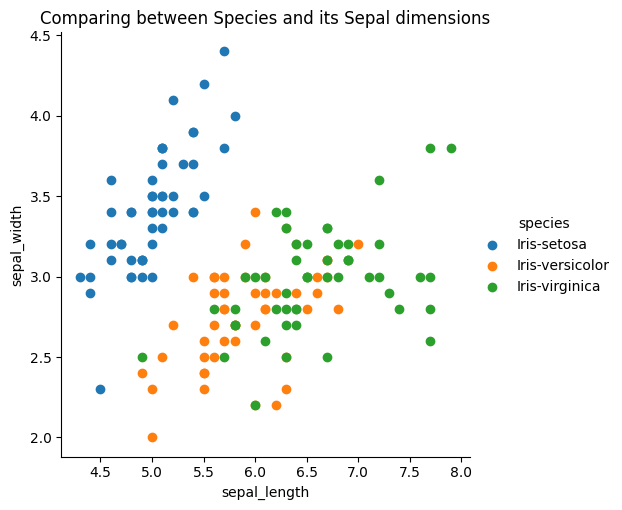

In [15]:
sns.FacetGrid(df, hue ="species", height = 5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.title('Comparing between Species and its Sepal dimensions')
plt.show()

Text(0.5, 1.0, 'Comparing between Species and its Petal dimensions')

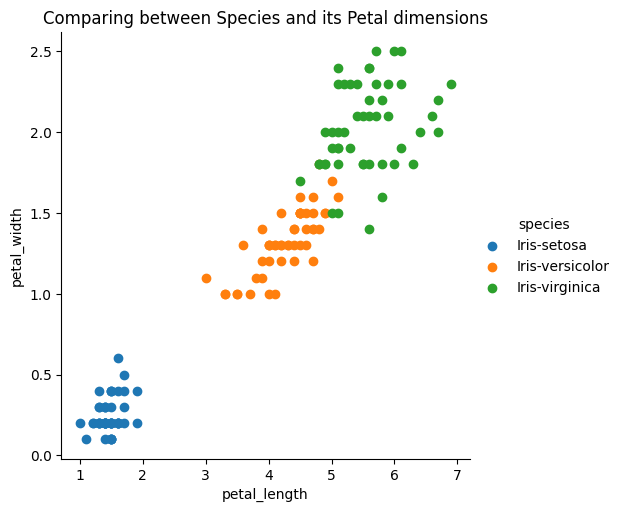

In [16]:
sns.FacetGrid(df, hue ="species",
              height = 5).map(plt.scatter,'petal_length','petal_width').add_legend()
plt.title('Comparing between Species and its Petal dimensions')

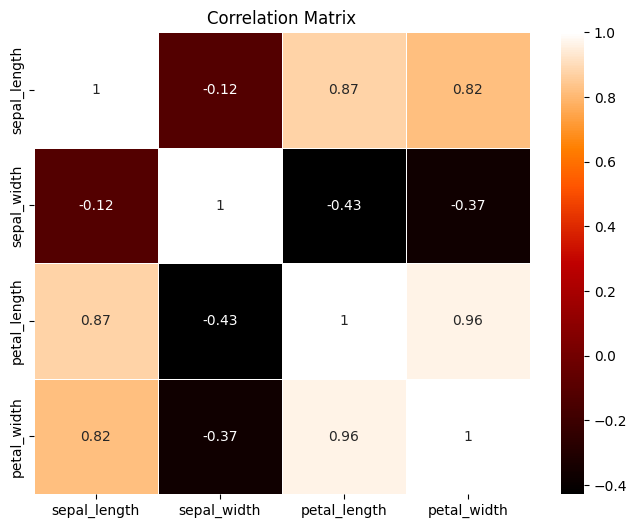

In [24]:
df=df.drop('species',axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='gist_heat', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

***Model*** ***Train***

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [33]:
y=df['species']
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [34]:
X=df.drop('species',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [35]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred=knn.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [41]:
knn.score(X_train,y_train)

0.9428571428571428

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
Y_predict=knn.predict(X_test)

conf_matrix=confusion_matrix(y_test,Y_predict)
print(conf_matrix)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


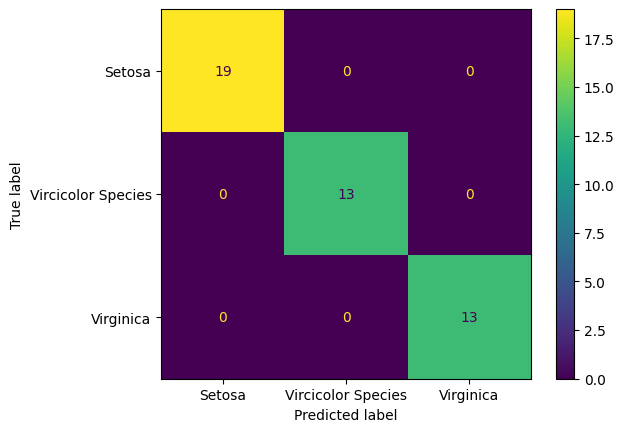

In [45]:
from sklearn import metrics

confusionmatrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['Setosa','Vircicolor Species','Virginica'])
confusionmatrix_display.plot()
plt.show()

In [46]:
class_report=classification_report(y_test,Y_predict)
print('Classification Report')
print(class_report)

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

